In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('../Data/raw/public_fac.csv')
df2 = pd.read_csv('../Data/raw/prop_values.csv')

In [3]:
df1['score'] = 1
df_p = df1.pivot_table(index = 'zipcode', columns = 'facgroup', aggfunc='sum', values = 'score')
df_p = df_p.fillna(0)

In [4]:
df2_g = df2[['zip', 'revised_market_value']].groupby(by = 'zip').mean()

In [5]:
df_p['zip'] = df_p.index
df_m = df_p.merge(df2_g, left_on='zip', right_on='zip')
df_m = df_m[~(df_m['zip']==11201.0)]

In [6]:
to_scale = df_m.columns[:-1].to_list()
to_scale.append('revised_market_value')

In [7]:
scaler = StandardScaler()
df_s = pd.DataFrame(scaler.fit_transform(df_m[to_scale]), columns = to_scale)
df_s

,ADULT SERVICES,CAMPS,CHILD SERVICES AND WELFARE,"CITY AGENCY PARKING, MAINTENANCE, AND STORAGE",CULTURAL INSTITUTIONS,DAY CARE AND PRE-KINDERGARTEN,EMERGENCY SERVICES,HEALTH CARE,HIGHER EDUCATION,HISTORICAL SITES,...,PUBLIC SAFETY,SCHOOLS (K-12),SOLID WASTE,TELECOMMUNICATIONS,TRANSPORTATION,VOCATIONAL AND PROPRIETARY SCHOOLS,WATER AND WASTEWATER,YOUTH SERVICES,zip,revised_market_value
0,-0.491063,0.301496,0.184523,-0.268974,3.971746,-0.203806,-0.113393,1.225159,3.795803,1.613019,...,-0.741817,-0.470676,0.369773,6.542171,2.083457,9.664056,-0.534540,0.606842,-1.227906,0.374434
1,5.929406,0.301496,2.007559,2.503039,2.716358,1.850935,1.660395,2.322896,-0.475938,2.077620,...,1.857510,1.474193,1.474052,-0.152854,0.481397,-0.007950,-0.534540,4.744248,-1.226306,1.986879
2,-0.491063,2.397610,0.184523,0.077528,5.626575,-0.089654,1.660395,0.878506,3.795803,5.949291,...,1.857510,0.779597,1.228656,-0.152854,2.238495,0.765811,-0.534540,-0.020037,-1.224706,1.245064
3,-0.491063,-0.222533,-0.524435,-0.615476,0.605025,-0.774567,-1.000287,0.531852,3.795803,3.006821,...,-0.741817,-0.262297,-0.366412,-0.152854,0.016283,0.572371,-0.534540,0.481466,-1.223106,1.714183
4,-0.491063,-0.222533,-0.828274,-0.615476,-0.193858,-0.888720,-0.113393,-0.334782,-0.475938,1.303286,...,-0.741817,-0.748514,-0.734505,-0.152854,-0.552190,-0.007950,-0.534540,-0.270789,-1.221505,-0.285527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,-0.491063,-0.746561,-0.524435,0.424029,-0.536237,-0.660415,0.773501,-0.219231,-0.475938,-0.555116,...,-0.741817,-0.192838,-0.734505,-0.152854,-0.552190,-0.394830,2.392068,-0.270789,1.480936,-0.377304
215,-0.491063,-0.746561,-0.929554,-0.615476,-0.536237,-1.002872,-1.000287,-0.854762,-0.475938,-0.555116,...,-0.741817,-1.026353,-0.979900,-0.152854,-0.862267,-0.394830,-0.534540,-0.981253,1.485736,10.740010
216,-0.491063,-0.746561,-0.929554,-0.615476,-0.593300,-1.117024,-1.000287,-0.854762,-0.475938,-0.709983,...,-0.741817,-1.026353,-0.979900,-0.152854,-0.810587,-0.394830,-0.534540,-0.981253,1.581737,-0.469201
217,-0.491063,-0.746561,-0.929554,-0.615476,-0.593300,-1.117024,-1.000287,-0.854762,-0.475938,-0.709983,...,-0.741817,-0.956893,-0.979900,-0.152854,-0.862267,-0.394830,-0.534540,-0.981253,1.636138,-0.329801


C:\Users\lkchi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


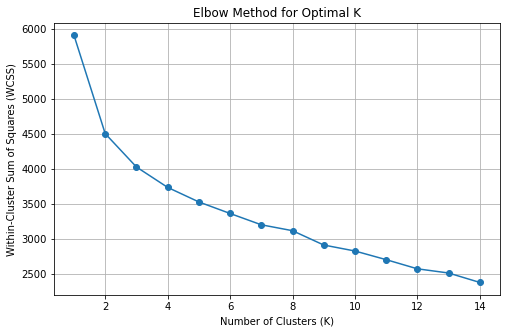

In [8]:
wcss = []
n_max = 15
for k in range(1, n_max):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_s[to_scale])
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(1,n_max), wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.savefig('WCSS.png')
plt.show()


In [9]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_s["Cluster"] = kmeans.fit_predict(df_s[to_scale])
df_m["Cluster"] = kmeans.fit_predict(df_s[to_scale])

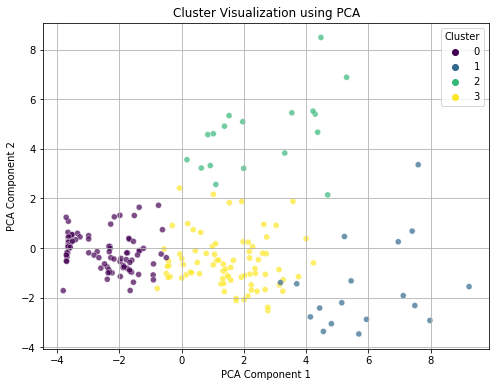

In [10]:
import seaborn as sns

pca = PCA(2)
pca_components = pca.fit_transform(df_s[to_scale])
df_s["PCA1"], df_s["PCA2"] = pca_components[:, 0], pca_components[:, 1]

pca_loadings = pd.DataFrame(
        pca.components_,
        columns=to_scale,
        index=["PCA1", "PCA2"]
    )

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_s["PCA1"], y=df_s["PCA2"], hue=df_s["Cluster"], palette="viridis", alpha=0.7)
plt.title("Cluster Visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.savefig('Clusters_PCA.png')
plt.show()

In [11]:
c_avg = df_m.groupby('Cluster').mean()
c_diff = (c_avg - df_m.mean())/df_m.std()
c_d = c_diff.copy()
c_diff.drop(['zip', 'revised_market_value'], axis = 1, inplace = True)

for c in range(optimal_k):
    print('Cluster: ', c, ' Number of zip codes: ', df_m.groupby('Cluster').count().iloc[c, 0])
    print('z score of housing value:', c_d.iloc[c, 26] )
    print(c_diff.T.sort_values(by = c, ascending = False).iloc[0:5, c])
    print('\n')
    print(c_diff.T.sort_values(by = c, ascending = True).iloc[0:5, c])
    print('\n')

Cluster:  0  Number of zip codes:  103
z score of housing value: 0.05074987096022032
WATER AND WASTEWATER            -0.086826
JUSTICE AND CORRECTIONS         -0.104326
TELECOMMUNICATIONS              -0.152505
MATERIAL SUPPLIES AND MARKETS   -0.158636
OTHER PROPERTY                  -0.194352
Name: 0, dtype: float64


SOLID WASTE                     -0.750653
YOUTH SERVICES                  -0.746643
DAY CARE AND PRE-KINDERGARTEN   -0.725250
SCHOOLS (K-12)                  -0.721909
HEALTH CARE                     -0.681557
Name: 0, dtype: float64


Cluster:  1  Number of zip codes:  18
z score of housing value: 0.1521632038131437
HUMAN SERVICES                                   2.262065
CHILD SERVICES AND WELFARE                       2.126473
YOUTH SERVICES                                   1.988388
SCHOOLS (K-12)                                   1.902028
CITY AGENCY PARKING, MAINTENANCE, AND STORAGE    1.844311
Name: 1, dtype: float64


TELECOMMUNICATIONS                   -0.1525

In [12]:
import plotly.express as px
from urllib.request import urlopen
import json
#UNCOMMENT TO SEE PLOT

with open('../data/raw/ny_new_york_zip_codes_geo.min.json', 'rb') as f:
    nyc_zip = json.load(f)


In [ ]:
df_m['Cluster'] = df_m['Cluster'].astype(str)
fig = px.choropleth_map(
    df_m,
    geojson=nyc_zip,
    featureidkey='properties.ZCTA5CE10',
    locations='zip',
    color='Cluster',
    color_discrete_map={
                "0": "red",
                "1": "green",
                "2": "blue",
                "3": "magenta"},
    map_style='outdoors',
    center={'lat': 40.71, "lon": -74.01},
    zoom = 9
)
fig.show()
